In [105]:
# Importing the necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [106]:
# loading the data into pd dataframe
dataset = pd.read_csv("nyc_airbnb.csv")

In [107]:
# Looking at the data
dataset.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [108]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [109]:
dataset.shape

(48895, 16)

### Data Preprocessing

In [110]:
# Checking missing values in the dataset
dataset.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [111]:
# The data has some missing values.
# We shall replace "reviews_per_month" with 0 as below
dataset.fillna(
    {"reviews_per_month": 0},
    inplace=True
)

In [112]:
dataset.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [113]:
# Dropping the columns that are not necessary, 
# that is;
# id, host_name, last_review

cols_to_drop = ["id", "host_name", "last_review"]
dataset.drop(cols_to_drop, inplace=True, axis=1)
dataset.head()


,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [114]:
# Lets Examine the data using pd.describe()
dataset.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


Looking at the dataset, the minimum price is 0. That is
there are houses that do not have prices. 
We will exclude them from the dataset


In [115]:
dataset = dataset.loc[dataset["price"] > 0]
dataset.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.888400e+04,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000
mean,6.762203e+07,40.728953,-73.952176,152.755053,7.029887,23.271991,1.090800,7.144628,112.779498
std,7.861666e+07,0.054532,0.046159,240.170260,20.512224,44.551331,1.597213,32.956185,131.627271
min,2.438000e+03,40.499790,-74.244420,10.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,7.817310e+06,40.690100,-73.983080,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,3.079257e+07,40.723080,-73.955685,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,1.074344e+08,40.763120,-73.936290,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


### Visualizing the dataset

In [116]:
# Understanding the datatypes in the dataset
dataset.dtypes

name                               object
host_id                             int64
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [117]:
# dividing the dataset into numerical features and 
# categorical features
categorical_features = dataset.select_dtypes(include=["object"]) # Selecting string (object) datatypes
numerical_features = dataset.select_dtypes(exclude=["object"]) # Selecting numerical datatypes by excluding object datatypes

In [118]:
numerical_features.head()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,40.64749,-73.97237,149,1,9,0.21,6,365
1,2845,40.75362,-73.98377,225,1,45,0.38,2,355
2,4632,40.80902,-73.94190,150,3,0,0.00,1,365
3,4869,40.68514,-73.95976,89,1,270,4.64,1,194
4,7192,40.79851,-73.94399,80,10,9,0.10,1,0


In [119]:
categorical_features.head()

,name,neighbourhood_group,neighbourhood,room_type
0,Clean & quiet apt home by the park,Brooklyn,Kensington,Private room
1,Skylit Midtown Castle,Manhattan,Midtown,Entire home/apt
2,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,Harlem,Private room
3,Cozy Entire Floor of Brownstone,Brooklyn,Clinton Hill,Entire home/apt
4,Entire Apt: Spacious Studio/Loft by central park,Manhattan,East Harlem,Entire home/apt


In [120]:
# Getting the existing correlation between numerical features
numerical_features.corr()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
host_id,1.000000,0.020199,0.127022,0.015294,-0.017391,-0.140181,0.209752,0.154949,0.203434
latitude,0.020199,1.000000,0.084830,0.033899,0.024893,-0.015357,-0.018719,0.019518,-0.010942
longitude,0.127022,0.084830,1.000000,-0.149954,-0.062772,0.059015,0.138435,-0.114715,0.082669
price,0.015294,0.033899,-0.149954,1.000000,0.042805,-0.047926,-0.050531,0.057462,0.081847
minimum_nights,-0.017391,0.024893,-0.062772,0.042805,1.000000,-0.080080,-0.124870,0.127962,0.144275
number_of_reviews,-0.140181,-0.015357,0.059015,-0.047926,-0.080080,1.000000,0.589311,-0.072385,0.171975
reviews_per_month,0.209752,-0.018719,0.138435,-0.050531,-0.124870,0.589311,1.000000,-0.047322,0.163664
calculated_host_listings_count,0.154949,0.019518,-0.114715,0.057462,0.127962,-0.072385,-0.047322,1.000000,0.225712
availability_365,0.203434,-0.010942,0.082669,0.081847,0.144275,0.171975,0.163664,0.225712,1.000000


In [121]:
# We can visualize the same using a heatmap for better understanding
corr_matrix = numerical_features.corr()
plt.figure(figsize=(6, 4))
plt.title("Correlation Between Numerical Variables")
sns.heatmap(
    data=corr_matrix,
    annot=True,
    cmap="YlGnBu",
    linewidths=0.5
)

<Axes: title={'center': 'Correlation Between Numerical Variables'}>

In [122]:
dataset.head()

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [123]:
# Getting the relationship between price and neighborhood_group
# We first group the data according to neighborhoods

grouped_data = dataset.groupby(["neighbourhood_group"])["price"].aggregate("median").reset_index()
grouped_data


,neighbourhood_group,price
0,Bronx,65.0
1,Brooklyn,90.0
2,Manhattan,150.0
3,Queens,75.0
4,Staten Island,75.0


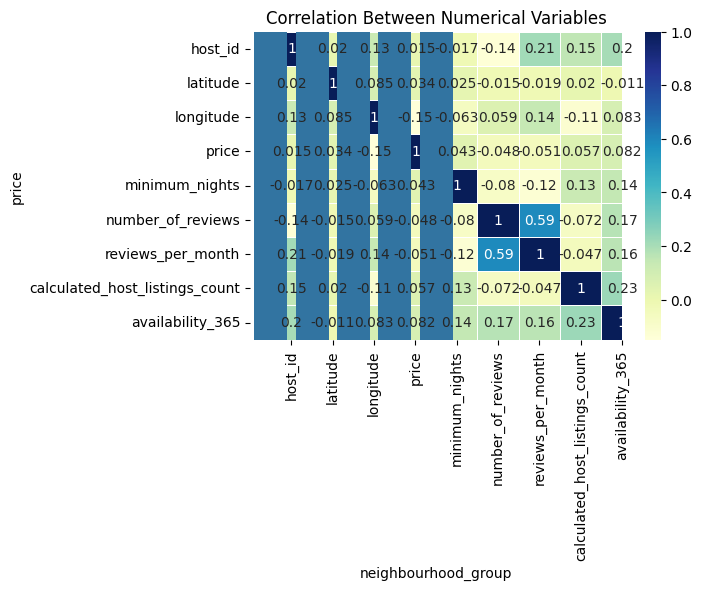

In [124]:
# Manhattan prices are higher than other neighborhoods
# Let's visualize the dataframe to view the same using barplots
x_axis, y_axis = "neighbourhood_group", "price"
sns.barplot(
    x=x_axis,
    y=y_axis,
    data=dataset,
) 
plt.show()

In [125]:
dataset.head()

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


#### Relationship between room type and prices

In [126]:
grouped_data = dataset.groupby(["room_type"])["price"].aggregate("median").reset_index()
grouped_data

,room_type,price
0,Entire home/apt,160.0
1,Private room,70.0
2,Shared room,45.0


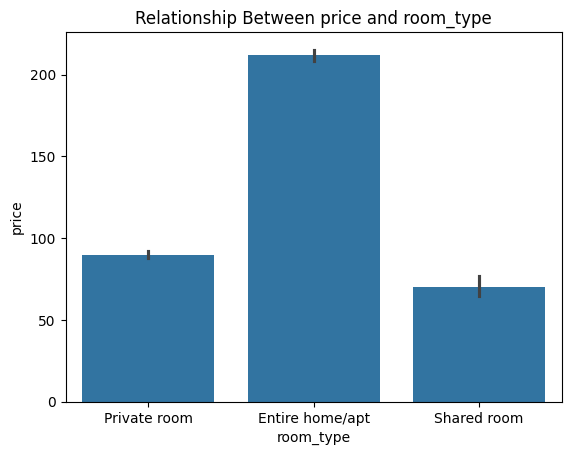

In [127]:
sns.barplot(
    x="room_type",
    y="price",
    data=dataset
)
plt.title("Relationship Between price and room_type")
plt.show()

- properties with room type as "Entire home/apt" were priced higher than other properties

#### Relationship between price and number of reviews

In [128]:
dataset.head()

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


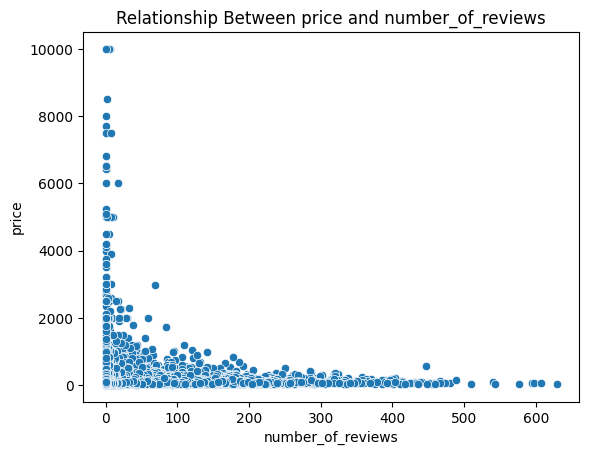

In [129]:
# Using scatterplots
sns.scatterplot(
    x="number_of_reviews",
    y="price",
    data=dataset
)
plt.title("Relationship Between price and number_of_reviews")
plt.show()

- Lower priced properties had higher number of reviews
- This could be because lower priced properties were more affordable hence attracting more occupants who gave thier reviews

##### Relationship between price and availability

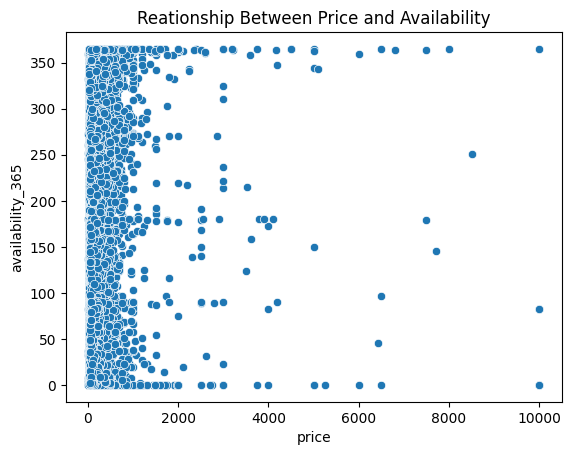

In [133]:
# Using scatter plots
sns.scatterplot(
    x="price",
    y="availability_365",
    data=dataset
)
plt.title("Reationship Between Price and Availability")
plt.show()

- Cheaper properties were highly avaialable that expensive properties/airbnbs

In [134]:
numerical_features

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,40.64749,-73.97237,149,1,9,0.21,6,365
1,2845,40.75362,-73.98377,225,1,45,0.38,2,355
2,4632,40.80902,-73.94190,150,3,0,0.00,1,365
3,4869,40.68514,-73.95976,89,1,270,4.64,1,194
4,7192,40.79851,-73.94399,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...
48890,8232441,40.67853,-73.94995,70,2,0,0.00,2,9
48891,6570630,40.70184,-73.93317,40,4,0,0.00,2,36
48892,23492952,40.81475,-73.94867,115,10,0,0.00,1,27
48893,30985759,40.75751,-73.99112,55,1,0,0.00,6,2


In [135]:
categorical_features

,name,neighbourhood_group,neighbourhood,room_type
0,Clean & quiet apt home by the park,Brooklyn,Kensington,Private room
1,Skylit Midtown Castle,Manhattan,Midtown,Entire home/apt
2,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,Harlem,Private room
3,Cozy Entire Floor of Brownstone,Brooklyn,Clinton Hill,Entire home/apt
4,Entire Apt: Spacious Studio/Loft by central park,Manhattan,East Harlem,Entire home/apt
...,...,...,...,...
48890,Charming one bedroom - newly renovated rowhouse,Brooklyn,Bedford-Stuyvesant,Private room
48891,Affordable room in Bushwick/East Williamsburg,Brooklyn,Bushwick,Private room
48892,Sunny Studio at Historical Neighborhood,Manhattan,Harlem,Entire home/apt
48893,43rd St. Time Square-cozy single bed,Manhattan,Hell's Kitchen,Shared room


In [141]:
encoded_data = pd.get_dummies(data=dataset, columns=["neighbourhood_group", "room_type"], dtype=int)
encoded_data.head()

,name,host_id,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,Clean & quiet apt home by the park,2787,Kensington,40.64749,-73.97237,149,1,9,0.21,6,365,0,1,0,0,0,0,1,0
1,Skylit Midtown Castle,2845,Midtown,40.75362,-73.98377,225,1,45,0.38,2,355,0,0,1,0,0,1,0,0
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Harlem,40.80902,-73.94190,150,3,0,0.00,1,365,0,0,1,0,0,0,1,0
3,Cozy Entire Floor of Brownstone,4869,Clinton Hill,40.68514,-73.95976,89,1,270,4.64,1,194,0,1,0,0,0,1,0,0
4,Entire Apt: Spacious Studio/Loft by central park,7192,East Harlem,40.79851,-73.94399,80,10,9,0.10,1,0,0,0,1,0,0,1,0,0


In [142]:
encoded_data.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
count,4.888400e+04,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000
mean,6.762203e+07,40.728953,-73.952176,152.755053,7.029887,23.271991,1.090800,7.144628,112.779498,0.022298,0.411075,0.443090,0.115907,0.007630,0.519741,0.456571,0.023689
std,7.861666e+07,0.054532,0.046159,240.170260,20.512224,44.551331,1.597213,32.956185,131.627271,0.147651,0.492034,0.496756,0.320117,0.087019,0.499615,0.498115,0.152079
min,2.438000e+03,40.499790,-74.244420,10.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.817310e+06,40.690100,-73.983080,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.079257e+07,40.723080,-73.955685,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.074344e+08,40.763120,-73.936290,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [143]:
encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48884 entries, 0 to 48894
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   name                               48868 non-null  object 
 1   host_id                            48884 non-null  int64  
 2   neighbourhood                      48884 non-null  object 
 3   latitude                           48884 non-null  float64
 4   longitude                          48884 non-null  float64
 5   price                              48884 non-null  int64  
 6   minimum_nights                     48884 non-null  int64  
 7   number_of_reviews                  48884 non-null  int64  
 8   reviews_per_month                  48884 non-null  float64
 9   calculated_host_listings_count     48884 non-null  int64  
 10  availability_365                   48884 non-null  int64  
 11  neighbourhood_group_Bronx          48884 non-null  int32  


In [144]:
encoded_numerical_features = encoded_data.select_dtypes(exclude=["object"])
encoded_numerical_features.head()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,2787,40.64749,-73.97237,149,1,9,0.21,6,365,0,1,0,0,0,0,1,0
1,2845,40.75362,-73.98377,225,1,45,0.38,2,355,0,0,1,0,0,1,0,0
2,4632,40.80902,-73.94190,150,3,0,0.00,1,365,0,0,1,0,0,0,1,0
3,4869,40.68514,-73.95976,89,1,270,4.64,1,194,0,1,0,0,0,1,0,0
4,7192,40.79851,-73.94399,80,10,9,0.10,1,0,0,0,1,0,0,1,0,0


In [150]:
# Splitting the data into dependent and independent variable
y = encoded_numerical_features.drop("price", axis=1) # The target variable
x = encoded_numerical_features


In [151]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score, mean_squared_error

In [152]:
# Splliting the data 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [153]:
# Creating and training LinearRegression Model 
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [157]:
# Making the prediction and evaluating the model
y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error {}".format(mse))
print("Root Mean Squared Error {}".format(rmse))
print("R Squared (R2) Score {}".format(r2))

Mean Squared Error 9.617988236908366e-16
Root Mean Squared Error 3.101288157670674e-08
R Squared (R2) Score 1.0
